In [1]:

import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 


In [2]:
f = open("Aida_lower_one.txt", 'rt', encoding='UTF8')
lines = f.readlines() # [0]
f.close()

In [3]:
'''
f = open("Aida.txt", 'r')
f1 = open('text1.txt', 'a')
while True:
    line = f.readline()
    line = line.lower()
    if not line: break
    #print(line)
    f1.write(line)
f.close()
f1.close()
'''

'\nf = open("Aida.txt", \'r\')\nf1 = open(\'text1.txt\', \'a\')\nwhile True:\n    line = f.readline()\n    line = line.lower()\n    if not line: break\n    #print(line)\n    f1.write(line)\nf.close()\nf1.close()\n'

In [3]:
tokenizer = RegexpTokenizer('[\w]+')

In [5]:
#tokenizer

In [4]:
#stop_words = stopwords.words('english')

In [7]:
#words =  lines[0].lower()

In [4]:
words =  lines

In [5]:
words

['a hall in the royal palace at memphis\n',
 '(left and right, a colonnade decorated with statues\n',
 'and flowering shrubs. rear, a great door beyond which\n',
 'can be seen temples, the palaces of memphis and the\n',
 'pyramids.)\n',
 '\n',
 'ramfis\n',
 'yes, it is rumoured that the ethiopian has dared\n',
 'to challenge us again, threatening\n',
 'thebes and the valley of the nile. shortly\n',
 'a messenger will bring us the details.\n',
 '\n',
 'radam?s\n',
 'have you consulted\n',
 'holy isis?\n',
 '\n',
 'ramfis\n',
 'she has named\n',
 'the supreme commander\n',
 'of the egyptian armies.\n',
 '\n',
 'radam?s\n',
 'oh, fortunate man!\n',
 '\n',
 'ramfis (looking steadily at radam?s, meaningfully)\n',
 'he is young and brave. now i shall go\n',
 'to inform the king of the deity’s decree.\n',
 '(ramfis goes out.)\n',
 '\n',
 'radam?s (solo)\n',
 'if only that warrior were i!\n',
 'if my dream might come true!\n',
 'an army of brave men, led by me ?\n',
 'victory, and the applause

In [6]:
# Import library
from transformers import pipeline

#Define pipeline to use
classifier = pipeline('zero-shot-classification')

In [11]:
#Define input text and candidate labels
#input_text = ['Intel Corporation is an American multinational corporation and technology company headquartered in Santa Clara, California, in Silicon Valley. It is the worlds largest and highest valued semiconductor chip manufacturer based on revenue,[4][5] and is the inventor of the x86 series of microprocessors, the processors found in most personal computers (PCs). Intel ranked No. 46 in the 2018 Fortune 500 list of the largest United States corporations by total revenue.[6] Intel is incorporated in Delaware']

In [7]:
input_text = words

In [8]:
candidate_labels = ['sad', 'joy', 'holy', 'fun']

#Run classifier
classifier(input_text, candidate_labels, multi_label = True)

[{'sequence': 'a hall in the royal palace at memphis\n',
  'labels': ['holy', 'fun', 'sad', 'joy'],
  'scores': [0.40759900212287903,
   0.28162050247192383,
   0.1195453628897667,
   0.10080259293317795]},
 {'sequence': '(left and right, a colonnade decorated with statues\n',
  'labels': ['fun', 'holy', 'joy', 'sad'],
  'scores': [0.6634050607681274,
   0.5313278436660767,
   0.09416690468788147,
   0.025432119145989418]},
 {'sequence': 'and flowering shrubs. rear, a great door beyond which\n',
  'labels': ['fun', 'holy', 'joy', 'sad'],
  'scores': [0.72447669506073,
   0.194050133228302,
   0.11681300401687622,
   0.00036086273030377924]},
 {'sequence': 'can be seen temples, the palaces of memphis and the\n',
  'labels': ['holy', 'fun', 'joy', 'sad'],
  'scores': [0.7274923324584961,
   0.5056436061859131,
   0.03730621933937073,
   0.01298407930880785]},
 {'sequence': 'pyramids.)\n',
  'labels': ['fun', 'sad', 'holy', 'joy'],
  'scores': [0.5237454771995544,
   0.08334439992904663,


In [9]:
pd.Series(words).value_counts().head(5)

\n            52
amneris\n      7
radam?s\n      6
all\n          6
the king\n     5
dtype: int64

In [10]:
tokens = tokenizer.tokenize(str(words))

In [11]:
stopped_tokens = [i for i in list((tokens)) if not i in stop_words]
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

In [12]:
# 중첩 리스트 하나의 리스트로 변환하는 함수
def flatten(l): 
    flatList = [] 
    for elem in l: 
        if type(elem) == list: 
            for e in elem: 
                flatList.append(e) 
        else: 
            flatList.append(elem) 
    return flatList

In [13]:
pd.Series(stopped_tokens2).value_counts()

aida        109
radam       108
etc          83
amneris      80
love         66
           ... 
eddies        1
offer         1
except        1
secrets       1
officers      1
Length: 1092, dtype: int64

In [14]:
pd.Series(stopped_tokens2)

0          act
1          one
2        scene
3          one
4         hall
         ...  
3562    guards
3563     radam
3564    ramfis
3565    priest
3566     hands
Length: 3567, dtype: object

In [15]:
#lines

In [16]:
# word count

In [17]:
from wordcloud import WordCloud
from collections import Counter

In [18]:
font_path = 'C:\\Windows\\Fonts\\Arial.ttf'

In [19]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

In [20]:
count = Counter(stopped_tokens2)

In [21]:
#count

In [22]:
wordcloud = wordcloud.generate_from_frequencies(count)

In [23]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [24]:
array = wordcloud.to_array()

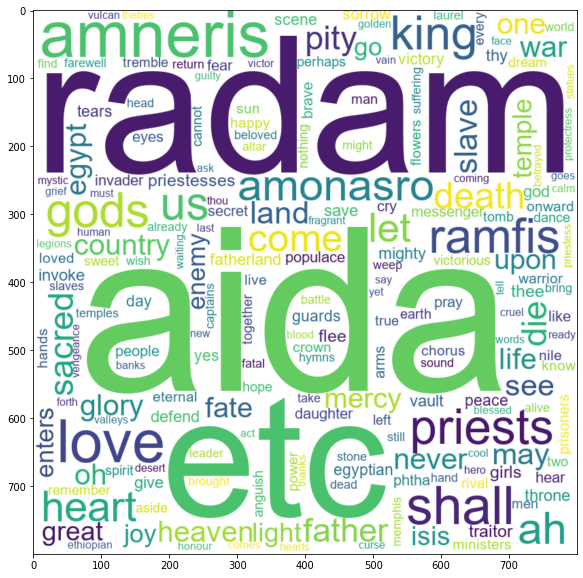

In [25]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [26]:
fig.savefig('wordcloud.png')